ANÁLISIS DE ATAQUES COMÚNES A REDES DE TELECOMUNICACIONES
Objetivo: Determinar heramientas de mitigación de ataques comúnes

Paso 1: Implimentación de librerías necesarias

In [1]:
# Importación de librerías necesarias para el análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Paso 2: Lectura e impresión de los datos del archivo

In [12]:
df = pd.read_csv("cybersecurity_attacks.csv")
print(len(df))
df.info()

40000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 no

Paso 3: Revisión de valores a través de un histograma para determinar las columnas importantes de nuestro análisis

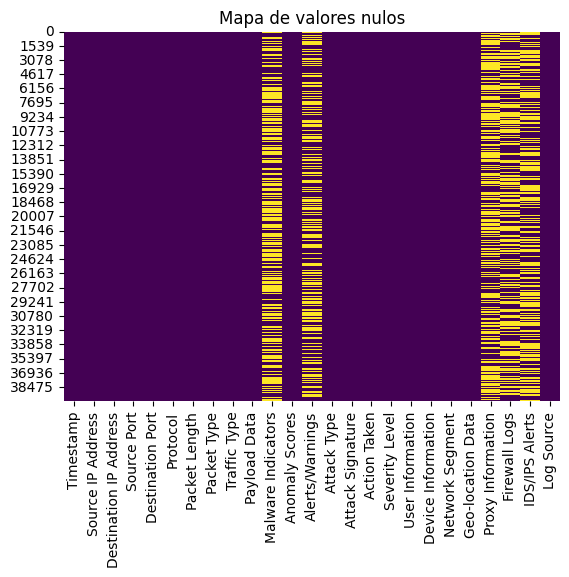

In [13]:
# Ver valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de valores nulos")
plt.show()

Paso 4: Nuestro análisis se va a enfocar en datos válidos por ende borraremos las columnas con datos nulos y datos basura como las ip de destino y fuente; datos no relevantes en nuestro análisis.

In [42]:
df_principal = df.drop(columns=["Malware Indicators", "Alerts/Warnings", "Proxy Information","Firewall Logs",
                                "IDS/IPS Alerts","Source IP Address" ,"Destination IP Address", "Packet Length",
                                "Payload Data","Anomaly Scores","Attack Signature","User Information","Network Segment",
                                "Action Taken","Device Information","Geo-location Data","Log Source"
                            ])       
df_principal

,Timestamp,Source Port,Destination Port,Protocol,Packet Type,Traffic Type,Attack Type,Severity Level
0,2023-05-30 06:33:58,31225,17616,ICMP,Data,HTTP,Malware,Low
1,2020-08-26 07:08:30,17245,48166,ICMP,Data,HTTP,Malware,Low
2,2022-11-13 08:23:25,16811,53600,UDP,Control,HTTP,DDoS,Low
3,2023-07-02 10:38:46,20018,32534,UDP,Data,HTTP,Malware,Medium
4,2023-07-16 13:11:07,6131,26646,TCP,Data,DNS,DDoS,Low
...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,31005,6764,UDP,Control,HTTP,DDoS,Medium
39996,2023-03-27 00:38:27,2553,28091,UDP,Control,HTTP,DDoS,High
39997,2022-03-31 01:45:49,22505,25152,UDP,Data,DNS,DDoS,Low
39998,2023-09-22 18:32:38,20013,2703,UDP,Data,FTP,Malware,Low


Paso 5: Para mejorar el analisis al contar con 4000 datos vamos a elminar los duplicados y determianr los puertos de mayor ataque.

In [43]:
duplicados_col = df_principal.duplicated(subset=['Source Port'])
print(df[duplicados_col])


                 Timestamp Source IP Address Destination IP Address  \
189    2020-04-25 06:37:33      121.69.27.10         156.223.190.24   
339    2023-06-11 16:01:42      70.32.78.247          204.146.61.21   
726    2023-07-02 20:00:22    181.120.82.230           39.224.36.31   
738    2022-07-12 02:36:03   142.151.225.203         56.108.198.195   
864    2021-08-30 19:23:13     132.44.161.49             137.95.0.4   
...                    ...               ...                    ...   
39990  2022-03-17 12:32:16    149.46.211.219           62.75.28.249   
39992  2021-08-13 18:57:13    163.227.253.64          98.219.251.81   
39994  2023-06-06 10:49:11   148.186.164.130          191.150.79.23   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
189          62568             43207     ICMP           1428        Dat